In [13]:
%matplotlib inline
import matplotlib.pyplot as pyplot

from tile_units import TileUnit
from tile_units import TileShape

# All the tiles!
## Basic tile units

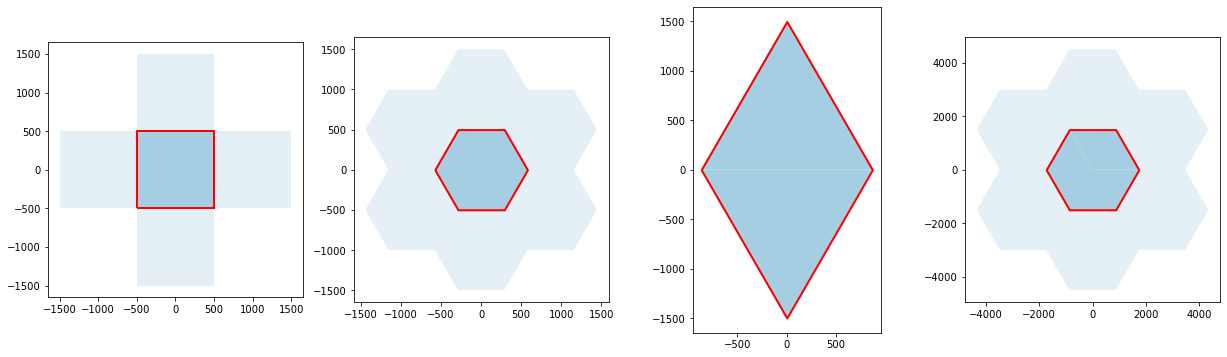

In [14]:
fig = pyplot.figure(figsize = (21, 6))
units = [TileUnit(), TileUnit(tile_shape = TileShape.HEXAGON),
         TileUnit(tile_shape = TileShape.TRIANGLE),
         TileUnit(tile_shape = TileShape.TRIANGLE, to_hex = True)]
for u, r, posn in zip(units, [1, 1, 0, 1], range(141, 145)):
    u.plot(ax = fig.add_subplot(posn), r = r)

## Cairo
The one true tiling.

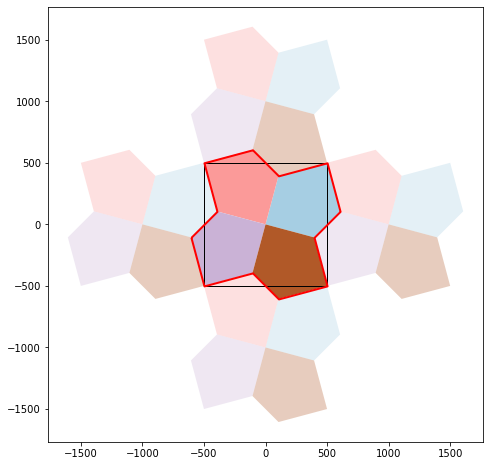

In [15]:
TileUnit(tiling_type = "cairo").plot(r = 1)

## Hexagon dissections

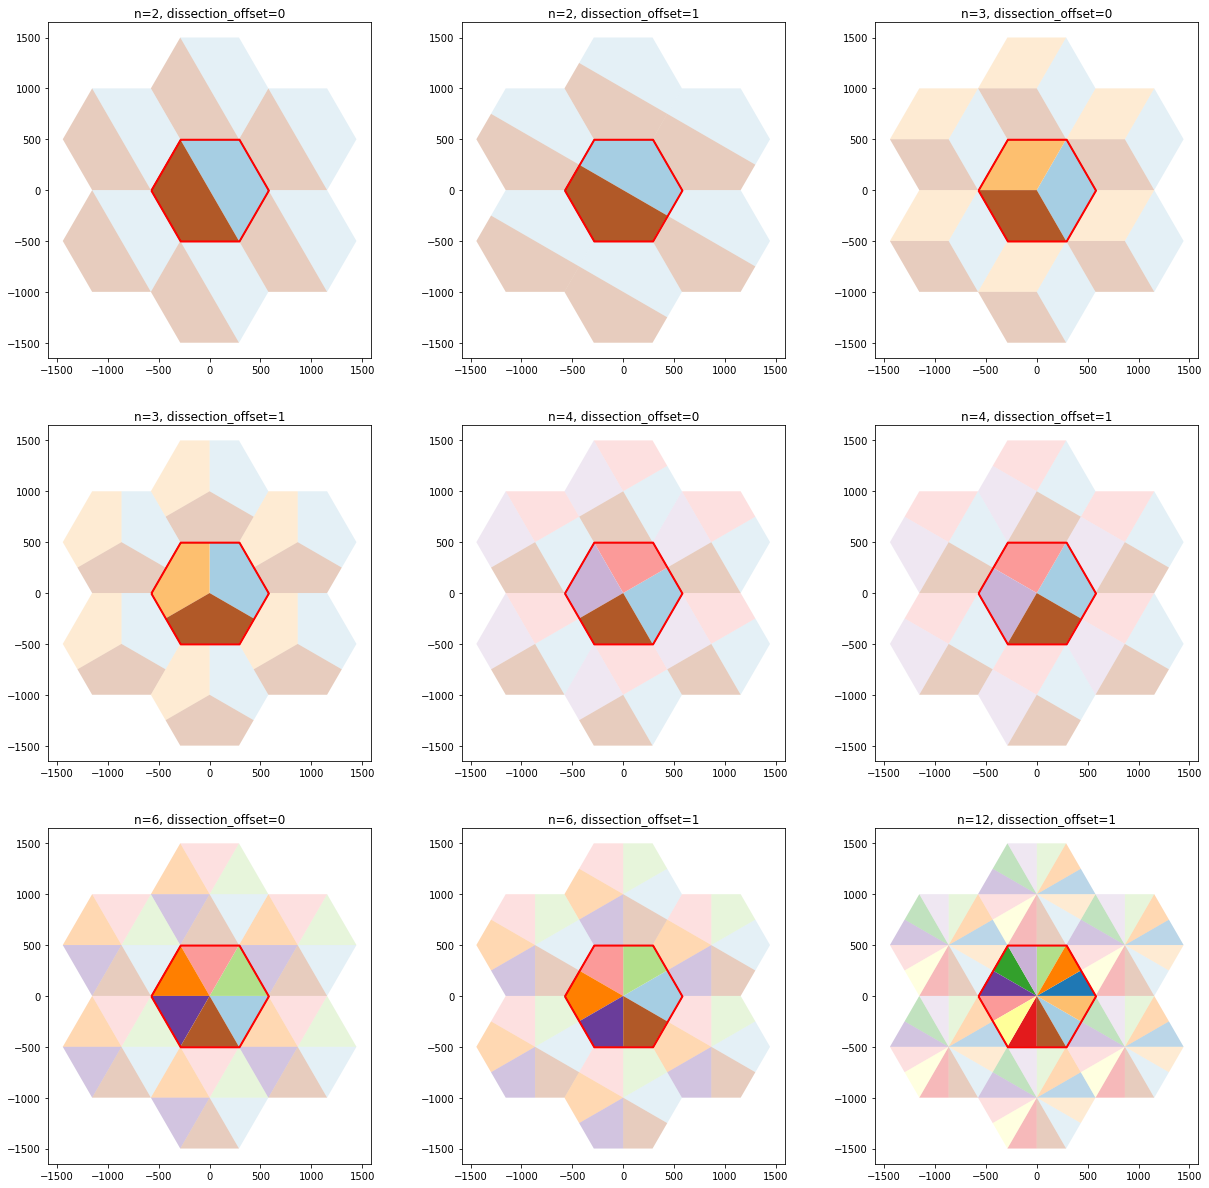

In [16]:
units = [
    TileUnit(tiling_type = "hex-dissection", n = 2, dissection_offset = 0), TileUnit(tiling_type = "hex-dissection", n = 2, dissection_offset = 1), TileUnit(tiling_type = "hex-dissection", n = 3, dissection_offset = 0),TileUnit(tiling_type = "hex-dissection", n = 3, dissection_offset = 1), TileUnit(tiling_type = "hex-dissection", n = 4, dissection_offset = 0),TileUnit(tiling_type = "hex-dissection", n = 4, dissection_offset = 1),
    TileUnit(tiling_type = "hex-dissection", n = 6, dissection_offset = 0), TileUnit(tiling_type = "hex-dissection", n = 6, dissection_offset = 1),TileUnit(tiling_type = "hex-dissection", n = 12)]
fig = pyplot.figure(figsize = (21, 21))
for u, posn in zip(units, range(331, 340)):
    ax = fig.add_subplot(posn)
    ax.set_title(f"n={u.n}, dissection_offset={u.dissection_offset}")
    u.plot(ax = ax, r = 1)

## Laves tile units
Some of these are determined using the hex dissection.

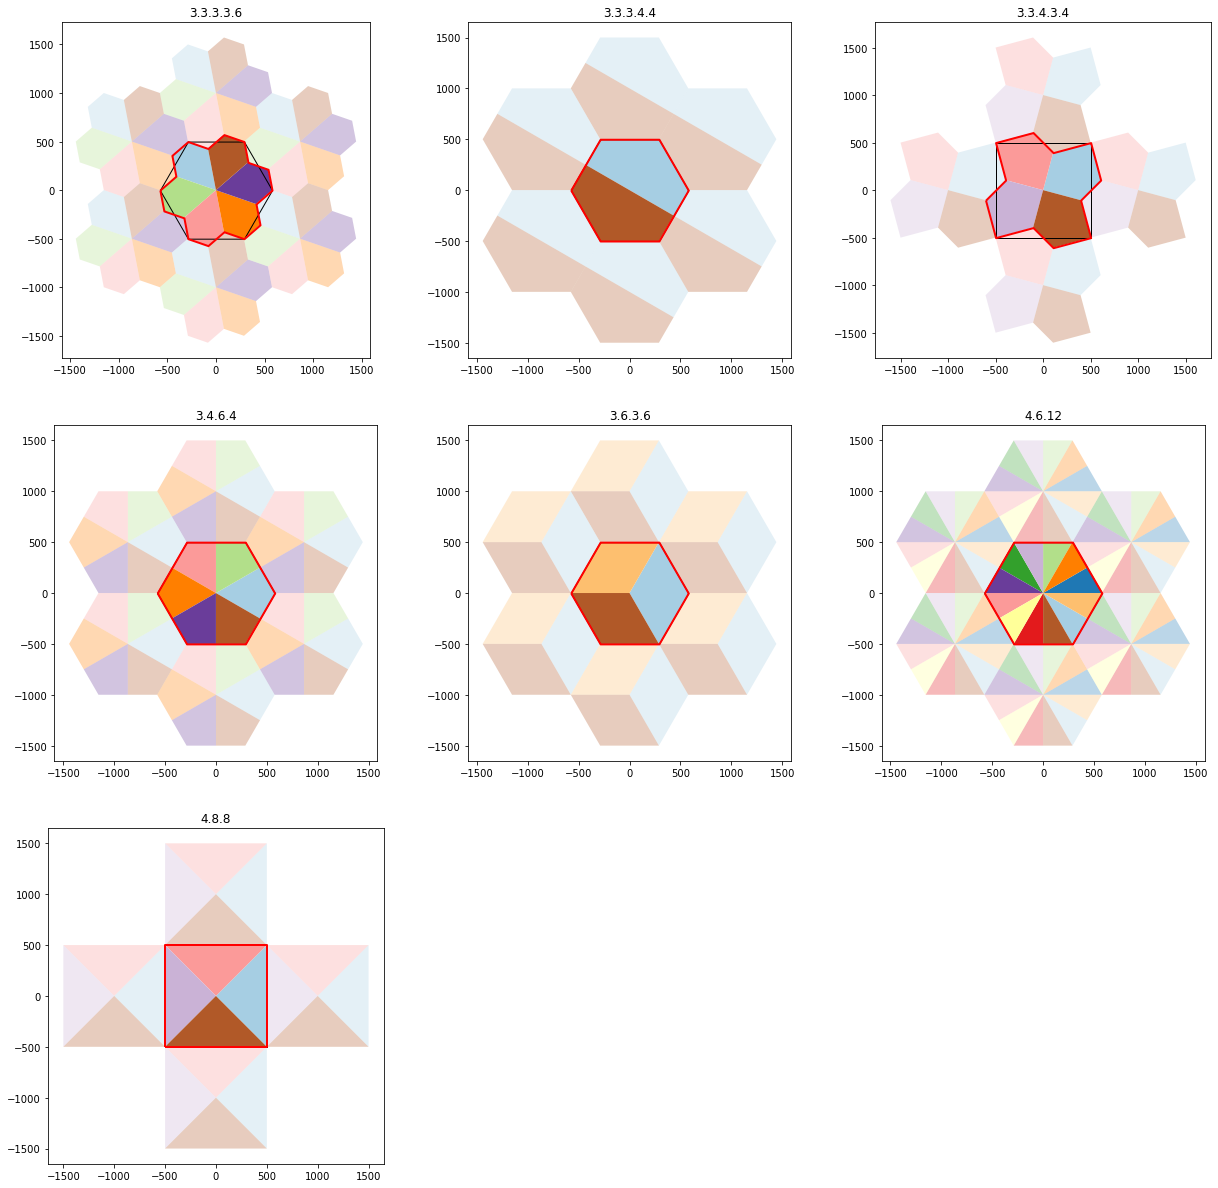

In [17]:
units = [TileUnit(tiling_type = "laves", code = "3.3.3.3.6"), 
         TileUnit(tiling_type = "laves", code = "3.3.3.4.4"), 
         TileUnit(tiling_type = "laves", code = "3.3.4.3.4"),
         TileUnit(tiling_type = "laves", code = "3.4.6.4"), 
         TileUnit(tiling_type = "laves", code = "3.6.3.6"),
         TileUnit(tiling_type = "laves", code = "4.6.12"),
         TileUnit(tiling_type = "laves", code = "4.8.8")]
fig = pyplot.figure(figsize = (21, 21))
for u, posn in zip(units, range(331, 338)):
    ax = fig.add_subplot(posn)
    ax.set_title(u.code)
    u.plot(ax = ax, r = 1)

## Archimedean tile units

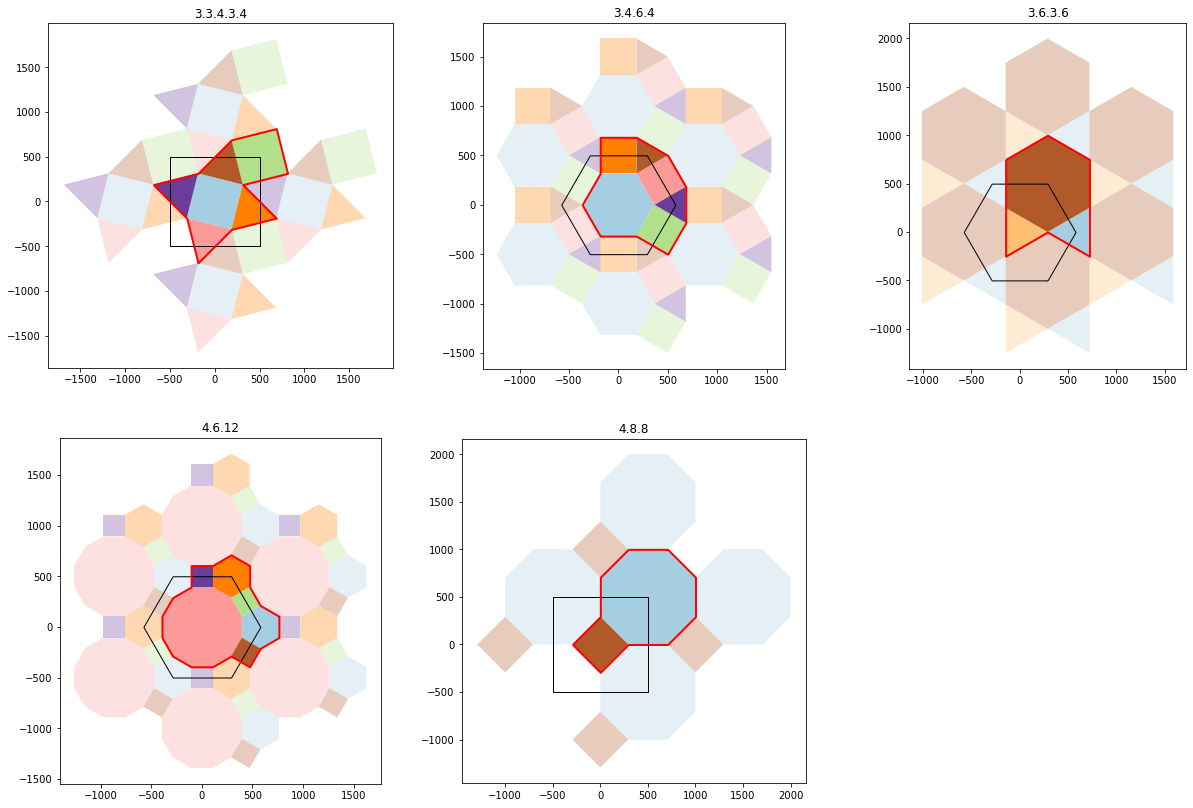

In [18]:
units = [TileUnit(tiling_type = "archimedean", code = "3.3.4.3.4"),
         TileUnit(tiling_type = "archimedean", code = "3.4.6.4"), 
         TileUnit(tiling_type = "archimedean", code = "3.6.3.6"),
         TileUnit(tiling_type = "archimedean", code = "4.6.12"),
         TileUnit(tiling_type = "archimedean", code = "4.8.8")]

fig = pyplot.figure(figsize = (21, 14))
for u, posn in zip(units, range(231, 237)):
    ax = fig.add_subplot(posn)
    ax.set_title(u.code)
    u.plot(ax = ax, r = 1)